# Building Recommender Systems with Spotify Data

## Import Libraries

In [4]:
import ipykernel
ipykernel.__version__
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams.update({'font.size': 22})
%matplotlib inline

## Reading the Data (musics dataset)

In [5]:
spotify_data = pd.read_csv('./data/data.csv.zip')
genre_data = pd.read_csv('./data/data_by_genres.csv')
data_by_year = pd.read_csv('./data/data_by_year.csv')

# Data format
spotify_data['artists'] = spotify_data['artists'].str.replace("['", "", regex=False)
spotify_data['artists'] = spotify_data['artists'].str.replace("']", "", regex=False)
spotify_data['artists'] = spotify_data['artists'].str.replace("'", "", regex=False)

spotify_data.head(40)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.9820,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.21100,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.7320,Dennis Day,0.819,180533,0.34100,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.9610,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.16600,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.9670,Frank Parker,0.275,210000,0.30900,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.9570,Phil Regan,0.418,166693,0.19300,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.5790,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.697,395076,0.34600,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.1300,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.9960,John McCormack,0.518,159507,0.20300,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.1150,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.9930,Sergei Rachmaninoff,0.389,218773,0.08800,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.3630,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.9960,Ignacio Corsini,0.485,161520,0.13000,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.1040,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.9820,Fortugé,0.684,196560,0.25700,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.5040,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


In [6]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [7]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [8]:
data_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


## Reading/Formating the data (playlist data)

In [9]:
playlist_data = pd.read_csv('./data/playlist_data.csv.zip', on_bad_lines='skip')

FileNotFoundError: [Errno 2] No such file or directory: './data/playlist_data.csv.zip'

In [ ]:
playlist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891680 entries, 0 to 12891679
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          object
 1    "artistname"    object
 2    "trackname"     object
 3    "playlistname"  object
dtypes: object(4)
memory usage: 393.4+ MB
Index(['user_id', ' "artistname"', ' "trackname"', ' "playlistname"'], dtype='object')


In [ ]:
playlist_data = playlist_data.rename(columns={' "artistname"': 'artists',' "trackname"': 'name', ' "playlistname"': 'playlistname'})
print(playlist_data.columns)

Index(['user_id', 'artists', 'name', 'playlistname'], dtype='object')
Number of different music-artist pairs: 2790788


## Merging with the Spotify Sataset

In [ ]:
merged_data = pd.merge(playlist_data[['artists', 'name', 'playlistname', 'user_id']], spotify_data, left_on=['artists', 'name'], right_on=['artists', 'name'])
merged_data = merged_data[['artists', 'name', 'playlistname', 'user_id', 'valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']]
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481798 entries, 0 to 3481797
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   artists           object 
 1   name              object 
 2   playlistname      object 
 3   user_id           object 
 4   valence           float64
 5   year              int64  
 6   acousticness      float64
 7   danceability      float64
 8   duration_ms       int64  
 9   energy            float64
 10  explicit          int64  
 11  instrumentalness  float64
 12  key               int64  
 13  liveness          float64
 14  loudness          float64
 15  mode              int64  
 16  popularity        int64  
 17  speechiness       float64
 18  tempo             float64
dtypes: float64(9), int64(6), object(4)
memory usage: 504.7+ MB


## Deleting duplicates

In [ ]:
merged_data = merged_data.drop_duplicates(subset=['name', 'artists', 'playlistname'])
merged_data = merged_data.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056240 entries, 0 to 2056239
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   artists           object 
 1   name              object 
 2   playlistname      object 
 3   user_id           object 
 4   valence           float64
 5   year              int64  
 6   acousticness      float64
 7   danceability      float64
 8   duration_ms       int64  
 9   energy            float64
 10  explicit          int64  
 11  instrumentalness  float64
 12  key               int64  
 13  liveness          float64
 14  loudness          float64
 15  mode              int64  
 16  popularity        int64  
 17  speechiness       float64
 18  tempo             float64
dtypes: float64(9), int64(6), object(4)
memory usage: 298.1+ MB


## Info about data_playlist

In [ ]:
print("Number of different playlists:", merged_data['playlistname'].nunique())
print("Number of different music-artist pairs:", merged_data.groupby(['name', 'artists']).ngroups)
print(merged_data.info())

Number of different playlists: 92920
Number of different music-artist pairs: 63269
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056240 entries, 0 to 2056239
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   artists           object 
 1   name              object 
 2   playlistname      object 
 3   user_id           object 
 4   valence           float64
 5   year              int64  
 6   acousticness      float64
 7   danceability      float64
 8   duration_ms       int64  
 9   energy            float64
 10  explicit          int64  
 11  instrumentalness  float64
 12  key               int64  
 13  liveness          float64
 14  loudness          float64
 15  mode              int64  
 16  popularity        int64  
 17  speechiness       float64
 18  tempo             float64
dtypes: float64(9), int64(6), object(4)
memory usage: 298.1+ MB
None


In [10]:
most_common_music = merged_data["name"].value_counts().index[1]
count = merged_data["name"].value_counts().iloc[1]
print("The most common music is '{}' with {} appearances.".format(most_common_music, count))

# group the data by music and artist, and count the number of occurrences
music_artist_counts = merged_data.groupby(['name', 'artists']).size().reset_index(name='count')

# sort the data by count in descending order
music_artist_counts = music_artist_counts.sort_values(by='count', ascending=False)

# display the top 10 most common music-artist pairs
print(music_artist_counts.head(10))

NameError: name 'merged_data' is not defined

## Splitting data_playlist into data_playlist2 & data_playlist_test

In [ ]:
# Get a list of unique 'playlistname'
unique_playlists = merged_data['playlistname'].unique()

# Shuffle the list
np.random.shuffle(unique_playlists)

# Split the list of unique 'playlistname' into two
half = len(unique_playlists) // 2
first_half_playlists = unique_playlists[:half]
second_half_playlists = unique_playlists[half:]

# Filter the original DataFrame to get two DataFrames
train_data = merged_data[merged_data['playlistname'].isin(first_half_playlists)]
test_data = merged_data[merged_data['playlistname'].isin(second_half_playlists)]

# Display the number of lines in each DataFrame
print('Number of lines in train_data:', len(train_data))
print('Number of lines in test_data:', len(test_data))

# Display the number of unique 'playlistname' in each DataFrame
print('Number of unique playlists in train_data:', train_data['playlistname'].nunique())
print('Number of unique playlists in test_data:', test_data['playlistname'].nunique())

Number of lines in train_data: 1008560
Number of lines in test_data: 1047680
Number of unique playlists in train_data: 46460
Number of unique playlists in test_data: 46460


## Exploratory Data Analysis

C:\Users\reube\AppData\Local\Temp\ipykernel_17212\129732028.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spotify_data['popularity'])


<Axes: xlabel='popularity', ylabel='Density'>

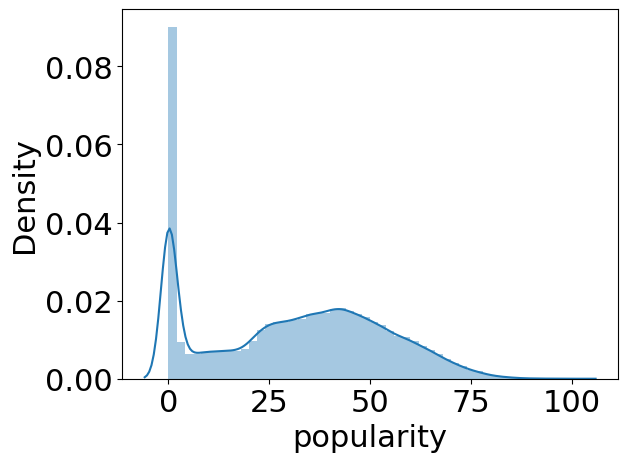

In [11]:
sns.distplot(spotify_data['popularity'])

### Music Over Time

In [ ]:
def get_decade(year):
    
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    
    return decade

spotify_data['decade'] = spotify_data['year'].apply(get_decade)

<Axes: xlabel='count', ylabel='decade'>

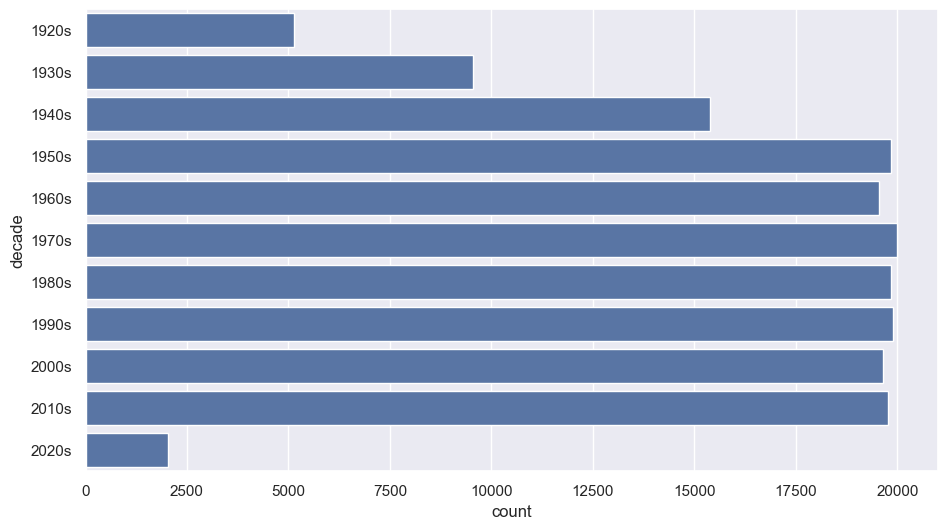

In [ ]:
sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(spotify_data['decade'])

### Characteristics of Different Genres

In [ ]:
top10_genres = genre_data.nlargest(10, 'popularity')

## Clustering Genres

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])

X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

In [15]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=2))])
genre_embedding = tsne_pipeline.fit_transform(X)

projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.003s...
[t-SNE] Computed neighbors for 2973 samples in 0.166s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] Computed conditional probabilities in 0.045s
[t-SNE] Iteration 50: error = 78.8275528, gradient norm = 0.0283627 (50 iterations in 0.507s)
[t-SNE] Iteration 100: error = 76.2442245, gradient norm = 0.0012216 (50 iterations in 0.352s)
[t-SNE] Iteration 150: error = 76.1406479, gradient norm = 0.0005526 (50 iterations in 0.345s)
[t-SNE] Iteration 200: error = 76.1151505, gradient norm = 0.0001849 (50 iterations in 0.327s)
[t-SNE] Iteration 250: error = 76.1061859, gradient norm = 0.0000856 (50 iterations in 0.331s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106186
[t-SNE] Iteration 300: erro

## Clustering Songs

In [16]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=2))], verbose=True)
X = spotify_data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
Initialization complete
Iteration 0, inertia 1511422.5174011658.
Iteration 1, inertia 1152188.3302214374.
Iteration 2, inertia 1120994.9223201175.
Iteration 3, inertia 1108525.2578405994.
Iteration 4, inertia 1099089.1082850092.
Iteration 5, inertia 1094665.9621913228.
Iteration 6, inertia 1092133.7085012898.
Iteration 7, inertia 1090405.887948487.
Iteration 8, inertia 1089071.612236396.
Iteration 9, inertia 1088037.7569338765.
Iteration 10, inertia 1087294.1333361382.
Iteration 11, inertia 1086670.6443474353.
Iteration 12, inertia 1086045.4416230388.
Iteration 13, inertia 1085373.454178915.
Iteration 14, inertia 1084537.4119489416.
Iteration 15, inertia 1083472.2717497884.
Iteration 16, inertia 1082105.645821104.
Iteration 17, inertia 1080394.5119183254.
Iteration 18, inertia 1078492.3399796132.
Iteration 19, inertia 1076947.7979918853.
Iteration 20, inertia 1075855.6230325548.
Iteration 21, inertia 1074982.9975767

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=20, verbose=2))],
         verbose=True)

In [17]:
song_cluster_labels = song_cluster_pipeline.predict(X)

In [18]:
spotify_data['cluster_label'] = song_cluster_labels

In [19]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)

projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = spotify_data['name']
projection['cluster'] = spotify_data['cluster_label']

## Building a Content-Based Recommender System

In [21]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

def get_song_data(song, spotify_data):

    song_data = spotify_data[(spotify_data['name'] == song['name']) 
                            & (spotify_data['year'] == song['year'])].iloc[0]
    return song_data

        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict
        

def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')


In [44]:
recommend_songs([{'name': "Secrets", 'year': 2020}], spotify_data)

C:\Users\reube\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[{'name': 'Manes Matzore', 'year': 1930, 'artists': 'Roza Eskenazi'},
 {'name': 'Akşam Olur - Anadolu Koşması',
  'year': 1924,
  'artists': 'Bayan Sultan'},
 {'name': 'Valses, Op. 69: No. 2 in B Minor',
  'year': 1926,
  'artists': 'Frédéric Chopin, Dinu Lipatti'},
 {'name': 'II. Le quai du porte de Famagouste',
  'year': 1921,
  'artists': 'Ildebrando Pizzetti, Arturo Toscanini'},
 {'name': 'Mi Alazan Tostado - Remasterizado',
  'year': 1923,
  'artists': 'Ignacio Corsini'},
 {'name': 'Mi mou thimizis ta palia',
  'year': 1930,
  'artists': 'Nikos Gounaris, Fotis Polimeris, G. Nikolaidis'},
 {'name': '24 préludes, Op. 28: No. 16 in B-Flat Minor (Presto con fuoco)',
  'year': 1926,
  'artists': 'Frédéric Chopin, Alfred Cortot'},
 {'name': 'Tou Kitsou I Mana',
  'year': 1930,
  'artists': 'Sotiris Stasinopoulos'},
 {'name': 'Preludes: Op. 13, No. 6 in B-Minor',
  'year': 1928,
  'artists': 'Alexander Scriabin, Vladimir Horowitz'},
 {'name': 'Preludes: Op. 13, No. 6 in B-Minor',
  'year

## Recuperer le dataset de playlist

In [37]:
# Normalement seule cette ligne est nécessaire, mais pour l'instant nous créons nous-même le fichier CSV
# df = pd.read_csv('spotify_data.csv')

# Créer une copie du DataFrame
playlist_data = spotify_data.copy()

# Ajouter colonne playlist avec 10 musiques par playlist
playlist_data['playlist id'] = (np.arange(len(playlist_data)) // 10).astype(str)

# Enregistrer la copie du DataFrame dans un nouveau fichier CSV
playlist_data.to_csv('playlist_data.csv', index=False)

In [ ]:
playlist_data.head(50)

## test

In [46]:
def compare_songs_in_playlist(playlist_id, spotify_data, playlist_data):
    # Créer song_list1 et song_list2
    song_list1 = playlist_data[playlist_data['playlist id'] == playlist_id].iloc[:5][['name', 'year']].to_dict('records')
    song_list2 = playlist_data[playlist_data['playlist id'] == playlist_id].iloc[5:10][['name', 'year', 'artists']].to_dict('records')

    # Obtenir la liste des chansons recommandées
    recommended_songs = recommend_songs(song_list1, spotify_data, 10)

    # Convertir song_list2 et recommended_songs en ensembles
    song_list2_set = set(tuple(song.items()) for song in song_list2)
    recommended_songs_set = set(tuple(song.items()) for song in recommended_songs)

    # Obtenir l'intersection des deux ensembles
    common_songs = song_list2_set & recommended_songs_set

    # Compter le nombre de chansons communes
    return len(common_songs)

# Exécuter la fonction pour les 10 premières playlists
for i in range(10):
    num_common_songs = compare_songs_in_playlist(str(i), spotify_data, playlist_data)
    print(f"Playlist {i}: {num_common_songs} chansons communes")

C:\Users\reube\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\reube\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\reube\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Playlist 0: 0 chansons communes
Playlist 1: 0 chansons communes
Playlist 2: 0 chansons communes


C:\Users\reube\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\reube\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\reube\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Playlist 3: 0 chansons communes
Playlist 4: 0 chansons communes
Playlist 5: 0 chansons communes


C:\Users\reube\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\reube\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\reube\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Playlist 6: 0 chansons communes
Playlist 7: 0 chansons communes
Playlist 8: 0 chansons communes
Playlist 9: 0 chansons communes


C:\Users\reube\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
